In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [4]:
# Personal Loan 데이터 불러오기

ploan = pd.read_csv("./data/Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무

'''

In [6]:
# 의미없는 변수 제거 ID,ZIP code 제외
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [7]:
# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


## 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터

In [8]:
# 대출여부 : 1 or 0
feature_columns = ploan_processed.columns.difference(['Personal Loan'])
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X,y, stratify=y, train_size=0.7, test_size = 0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


## 로지스텍회귀모형 모델링 y=f(x)

In [10]:
## 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.6030
Time:                        01:15:49   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [12]:
# performance measure
print('model AIC:', '{:.5f}'.format(results.aic))

model AIC: 482.69329


In [13]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [14]:
np.exp(results.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [15]:
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [16]:
## threshold 설정
def cut_off(y, threshold):
    Y = y.copy() # copy 함수를 사용하여 이전의 y값이 변하지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [17]:
## confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [18]:
## confusion matrix accuracy 계산
(cfmat[0,0]+cfmat[1,1])/len(pred_Y)

0.9466666666666667

In [19]:
def acc(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/(cfmat[0,0] + cfmat[0,1] + cfmat[1,0] + cfmat[1,1])
    return acc

## 임계값(cut_off)에 따른 성능지표 비교

In [20]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_Y)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC :  0.9463923891858513


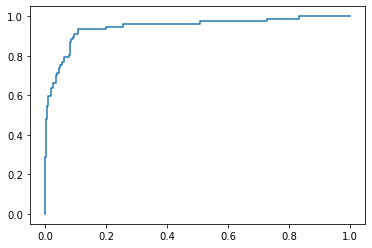

In [21]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr, fpr)
print('AUC : ', auc) # curve가 왼쪽 끝에 가까울수록 성능이 좋음. AUC는 그래프의 면적값(0-1)

In [22]:
## Experience, Mortage 변수 제거
feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience','Mortgage']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [23]:
train_x2, test_x2, train_y, test_y = train_test_split(X,y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [24]:
## 로지스틱 모델 적합
model = sm.Logit(train_y, train_x2)
result2 = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [25]:
# 이전 모델과 비교
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.6030
Time:                        01:20:02   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [27]:
results.summary()

# experience, mortgage의 변수의 p-value가 높다
# -> y에 끼친 영향력이 매우 적은 상황 
# ->  다른 변수들과 y를 설명하는 설명력의 변동성이 겹치지 않았다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.6030
Time:                        01:22:19   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [28]:
## 예측
pred_y = result2.predict(test_x2)

In [29]:
## threshold = 0.5
pred_y2 = cut_off(pred_y, 0.5)

In [30]:
# cofusion matrix
cfmat = confusion_matrix(test_y, pred_y2)
print(acc(cfmat))

0.944


In [31]:
threshold = np.arange(0,1,0.1)
pred_y = result2.predict(test_x2)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_y2 = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_y2)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


## Lasso & Ridge

In [32]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [34]:
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [57]:
## Lasso 적합
ll = Lasso(alpha=0.01) # alpha(람다값) -> 커질수록 회귀계수가 점점 0으로 가까이간다
ll.fit(train_x,train_y)

Lasso(alpha=0.01)

In [58]:
## 회귀 계수 출력
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.6030
Time:                        01:35:58   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [60]:
pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))

0.936


AUC: 0.9439995368672931


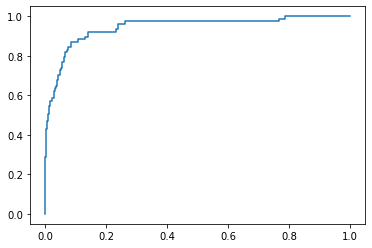

In [61]:
fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)
# print ROC curve
plt.plot(fpr, tpr)
# Print AUC
auc = np.trapz(tpr, fpr)
print('AUC:', auc)

In [68]:
## ridge 적합
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01)

In [69]:
## ridge result
rr.coef_

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [70]:
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [72]:
pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_ridge)
print(acc(cfmat))

0.932


AUC: 0.9494992377607533


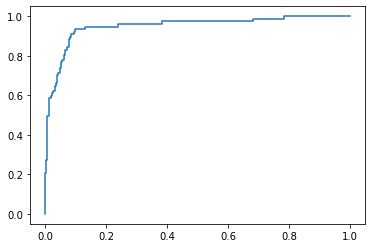

In [73]:
fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)
# print ROC curve
plt.plot(fpr, tpr)
# Print AUC
auc = np.trapz(tpr, fpr)
print('AUC:', auc)

In [76]:
# lambda 값에 따른 회귀 계수 / accuracy 계산
alpha = np.logspace(-3,1,5)

In [79]:
## lambda값 0.001 ~ 10까지 범위 설정
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [78]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    pred_y = lasso.predict(test_x)  # full model
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso
acc_table_lasso = pd.DataFrame(acc_table, index=alpha).T

In [80]:
df_lasso

# 회귀계수가 증가할수록 0으로 수렴

,0.001,0.010,0.100,1.000,10.000
0,-0.335006,-0.381869,-0.143698,-0.113103,0.102286
1,-0.002109,0.000000,0.000000,0.000000,-0.000000
2,0.006829,0.002048,0.000000,0.000000,0.000000
3,0.322174,0.114390,0.000000,0.000000,0.000000
4,-0.043385,-0.000000,-0.000000,-0.000000,-0.000000
5,0.076771,0.065834,0.000000,0.000000,0.000000
6,0.002534,0.000477,0.000000,0.000000,-0.000000
7,0.035728,0.031340,0.000000,0.000000,0.000000
8,0.003313,0.003554,0.003291,0.002893,0.000000
9,0.000004,0.000013,0.000016,0.000000,0.000000


In [82]:
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.936,0.894667,0.897333,0.897333


In [84]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x)  # full model
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))

df_ridge = pd.DataFrame(data, index=alpha).T
acc_table_ridge = pd.DataFrame(acc_table, index=alpha).T

In [85]:
df_ridge  # 0에 가깝게감.

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


In [86]:
acc_table_ridge

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


## lambda값의 변화에 따른 회귀계수 축소 시각화

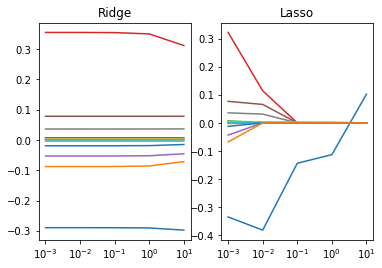

In [88]:
import matplotlib.pyplot as plt
axf = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title('Lasso')

plt.show()